<a href="https://colab.research.google.com/github/pratikrhalnor/DiabetesPrediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Prediction Project  Data Engineering Perspective


---



## Project Overview


---


This project aims to predict diabetes using patient clinical data. It demonstrates the application of **data engineering principles** to preprocess, clean, and prepare data for machine learning. The notebook covers:

- Handling structured and categorical data (e.g., Gender, Smoking History)  
- Feature scaling and normalization for numeric attributes (e.g., Age, BMI, Glucose Levels)  
- Integration of data preprocessing and machine learning workflows  
- Prediction using models such as Logistic Regression, Random Forest, or XGBoost  

This project emphasizes **clean, scalable, and reproducible data pipelines** to support accurate and reliable diabetes prediction.


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# **🧹 Data Cleaning**

---



Data preprocessing ensures that missing and inconsistent values are handled properly.

Step 1: Checked for missing values.

Step 2: Filled all missing values using the Median Imputation technique (robust to outliers).

In [62]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/diabetes_prediction_dataset.csv")

# Show first 5 rows
print(df.head())

# Show feature names (column names)
print("\nFeatures:", list(df.columns[:-1]))  # all columns except 'Fraudule'

# Show dataset description (basic stats)
print("\nDescription:\n", df.describe())
print("\nDataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())


   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  

Features: ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']

Description:
                  age  hypertension  heart_disease           bmi  \
count  100000.000000  100000.00000  100000.000000  99999.000000   
mean      

In [63]:
# Fill missing values with median for all numeric columns
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].median())

print("Missing values after imputation:\n", df.isnull().sum())


Missing values after imputation:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


# **📊 Exploratory Data Analysis (EDA)**

---



EDA is performed to gain insights into the dataset:

Checked distribution of Diabetes Patient vs Non Diabetes Patient cases.

Analyzed correlations between numerical features.

Visualized data patterns using bar charts, histograms, and heatmaps.

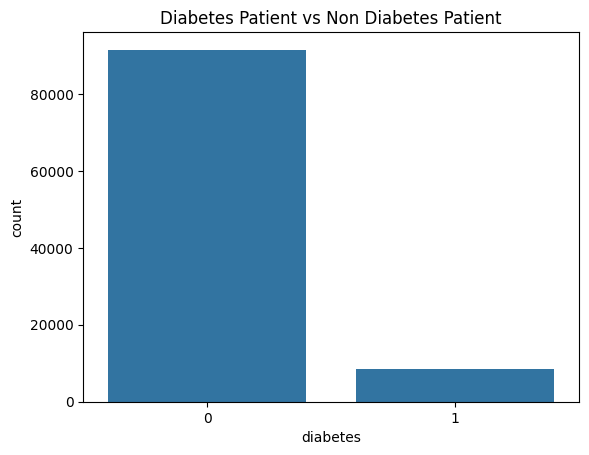

In [64]:

sns.countplot(x="diabetes", data=df)
plt.title("Diabetes Patient vs Non Diabetes Patient")
plt.show()



In [65]:
le_gender = LabelEncoder()
df['gender'] = le_gender.fit_transform(df['gender']).astype(float)
categorical_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col]).astype(float)
print(df.dtypes)

gender                 float64
age                    float64
hypertension             int64
heart_disease            int64
smoking_history        float64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object



# **🔎 Feature & Target Creation**

---



Features (X): All independent columns (e.g.gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level, etc.).

Target (y): Diabetes column (binary outcome).

In [66]:
# Features (X) and target (y)
X = df.drop("diabetes", axis=1)
y = df["diabetes"]

print("Features:", X.columns.tolist())
print("\nTarget variable distribution:\n", y.value_counts())


Features: ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']

Target variable distribution:
 diabetes
0    91500
1     8500
Name: count, dtype: int64


# **✂️ Train-Test Split**

---



The dataset is divided into:

Training Set (80%) → Used to train the model.

Testing Set (20%) → Used to evaluate model performance.

This ensures unbiased model evaluation.

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (80000, 8)
Testing set size: (20000, 8)


# **⚖️ Data Scaling**

---



Features are scaled using StandardScaler, ensuring that all features contribute equally to the model and eliminating bias from large numerical ranges.

In [68]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **🤖 Choosing the ML Algorithm**

---



We selected Random Forest Classifier due to:

Ability to handle imbalanced classes using class_weight

Interpretability via feature importance scores

In [69]:
model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
model.fit(X_train_scaled, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

# **📌 Model Evaluation**

---



We evaluate the trained model using:

Confusion Matrix → To visualize correct vs incorrect predictions.

Classification Report → Precision, Recall, F1-Score.

Accuracy Score → Overall model correctness.

Accuracy: 0.9699

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       0.94      0.69      0.80      1700

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



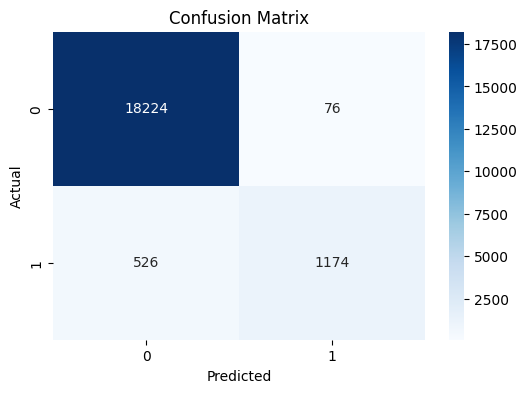

In [70]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# **📊 Feature Importance**

---





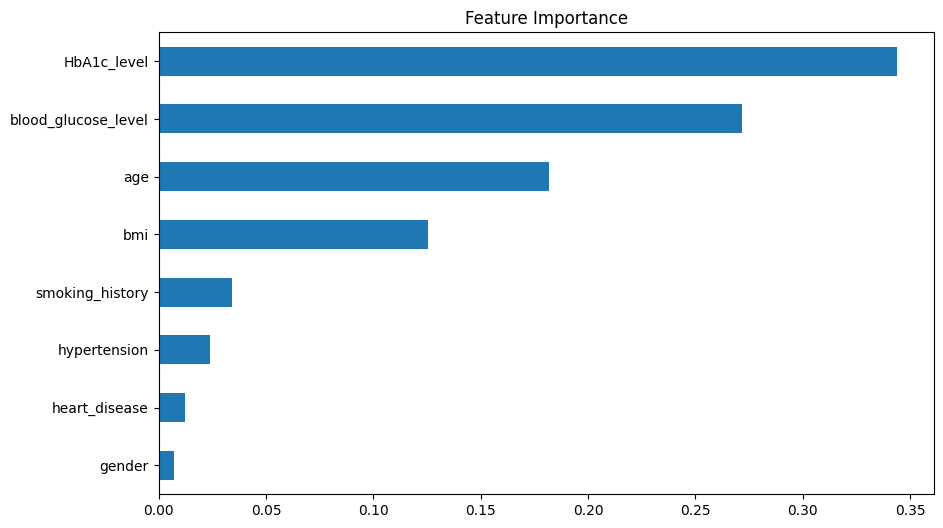

In [71]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", figsize=(10,6))
plt.title("Feature Importance")
plt.show()


# **🧪 Testing the Model**

---

In [72]:
# Interactive form for Diabetes Prediction (Colab)
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

# Input widgets
gender = widgets.Dropdown(options={'Female': 0.0, 'Male': 1.0}, description="Gender:")
age = widgets.FloatText(description="Age:")
hypertension = widgets.IntText(description="Hypertension (0/1):")
heart_disease = widgets.IntText(description="HeartDisease (0/1):")
smoking_history = widgets.Dropdown(options={'Never': 0.0, 'Current': 1.0, 'Former': 2.0}, description="SmokingHistory:")
bmi = widgets.FloatText(description="BMI:")
hba1c = widgets.FloatText(description="HbA1c Level:")
blood_glucose = widgets.IntText(description="Blood Glucose:")

button = widgets.Button(description="Predict")

# Prediction function
def on_button_click(b):
    # Prepare new data
    new_data = pd.DataFrame([{
        'gender': gender.value,
        'age': age.value,
        'hypertension': hypertension.value,
        'heart_disease': heart_disease.value,
        'smoking_history': smoking_history.value,
        'bmi': bmi.value,
        'HbA1c_level': hba1c.value,
        'blood_glucose_level': blood_glucose.value
    }])

    # Scale numeric features
    new_scaled = scaler.transform(new_data)

    # Predict
    prediction = model.predict(new_scaled)[0]

    print("\nResult:", "🚨 Diabetes Detected" if prediction == 1 else "✅ No Diabetes")

button.on_click(on_button_click)

# Display widgets
display(gender, age, hypertension, heart_disease, smoking_history, bmi, hba1c, blood_glucose, button)


Dropdown(description='Gender:', options={'Female': 0.0, 'Male': 1.0}, value=0.0)

FloatText(value=0.0, description='Age:')

IntText(value=0, description='Hypertension (0/1):')

IntText(value=0, description='HeartDisease (0/1):')

Dropdown(description='SmokingHistory:', options={'Never': 0.0, 'Current': 1.0, 'Former': 2.0}, value=0.0)

FloatText(value=0.0, description='BMI:')

FloatText(value=0.0, description='HbA1c Level:')

IntText(value=0, description='Blood Glucose:')

Button(description='Predict', style=ButtonStyle())


Result: ✅ No Diabetes

Result: 🚨 Diabetes Detected

Result: 🚨 Diabetes Detected

Result: ✅ No Diabetes

Result: 🚨 Diabetes Detected

Result: ✅ No Diabetes

Result: 🚨 Diabetes Detected

Result: ✅ No Diabetes
